**AFRICAN NAMES**

Vamos começar! Mas antes, uma observação importante. Todos os resultados deste notebook resultam **tão somente** da análise deste banco de dados em questão, não refletindo necessariamente o que aconteceu na História. Para atestar as informações aqui contidas, é necessária a confirmação através de pessoas com *expertise* no assunto, como historiadores, antropólogos, linguistas, etc. 

Primeiro, vamos importar os pacotes:

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('seaborn-colorblind')

Carregando o arquivo:

In [5]:
file = pd.read_csv('/home/fabi/Desktop/datasets/slave_trade/AfricanNamesDatabase.csv')

Pronto! Agora podemos começar a conhecer o banco de dados, utilizando um comando bem básico:

In [6]:
file.head()

,ID,Voyage ID,Name,Sexage,Age,Height (in),Ship name,Arrival,Disembarkation,Embarkation,Country of Origin
0,1,2314,Bora,Man,30,62.5,NS de Regla,1819,Freetown,Little Bassa,
1,2,2315,Flam,Man,30,64,Fabiana,1819,Freetown,Trade Town,
2,3,2315,Dee,Man,28,65,Fabiana,1819,Freetown,Trade Town,
3,4,2315,Pao,Man,22,62.5,Fabiana,1819,Freetown,Trade Town,Crue
4,5,2315,Mufa,Man,16,59,Fabiana,1819,Freetown,Trade Town,Crue


Podemos ver que alguns dados estão em branco, como na coluna *Country of Origin*. Vamos ter que cuidar disso. Mas antes, vamos explorar um pouco mais:

In [7]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91490 entries, 0 to 91489
Data columns (total 11 columns):
ID                   91490 non-null int64
Voyage ID            91490 non-null int64
Name                 91490 non-null object
Sexage               91490 non-null object
Age                  91490 non-null object
Height (in)          89948 non-null object
Ship name            91490 non-null object
Arrival              91490 non-null int64
Disembarkation       91490 non-null object
Embarkation          91490 non-null object
Country of Origin    91481 non-null object
dtypes: int64(3), object(8)
memory usage: 7.7+ MB


Temos aí mais algumas informações úteis, como a quantidade de dados em cada coluna. Porém, conforme vimos acima, devemos desconfiar que essas informações podem nos levar ao engano, porque dados em branco também são contados. Na verdade, teremos que substituir esses dados em branco por uma outra coisa que o Python entenda como um dado faltante. Calma, depois vamos entender melhor.

Uma outra questão é que vai ser importante mudar o tipo de dado de *object* para *category*. (Conheça mais as vantagens desse procedimento neste link: https://pbpython.com/pandas_dtypes_cat.html - basta ler "Introduction" e "Pandas Category Data Type"). 

Prosseguindo:

In [8]:
file.describe()

,ID,Voyage ID,Arrival
count,91490.000000,91490.000000,91490.000000
mean,62122.019762,17698.248792,1831.402383
std,51305.069417,82016.880136,9.524704
min,1.000000,557.000000,1808.000000
25%,22935.250000,2443.000000,1826.000000
50%,45822.500000,2871.000000,1832.000000
75%,101263.750000,3601.000000,1837.000000
max,199932.000000,500082.000000,1862.000000


Este método funciona em dados numéricos. E aqui descobrimos uma outra mudança de tipo de dados que precisará ser feita. As colunas *Age* (idade) e *Height (in)* (altura) também são dados numéricos, porém constam como *object*. Por isso elas não estão aparecendo no *output*. Vamos deixar a análise desses dados para quando fizermos a mudança.

In [9]:
file.columns

Index(['ID', 'Voyage ID', 'Name', 'Sexage', 'Age', 'Height (in)', 'Ship name',
       'Arrival', 'Disembarkation', 'Embarkation', 'Country of Origin'],
      dtype='object')

Acima estão os nomes das colunas. Agora, vamos conhecer o tamanho do banco de dados:

In [10]:
file.shape

(91490, 11)

Há 91.490 linhas (pessoas) e 11 colunas (características). 

De acordo com o que vimos até aqui, realizaremos agora algumas transformações. Primeiro, vamos substituir os espaços vazios por *np.nan*. Assim suprimos a necessidade de fazer com que o Python os reconheçam como dados perdidos, em branco.

In [11]:
file = file.replace(' ', np.nan)

In [12]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91490 entries, 0 to 91489
Data columns (total 11 columns):
ID                   91490 non-null int64
Voyage ID            91490 non-null int64
Name                 91490 non-null object
Sexage               78612 non-null object
Age                  90364 non-null object
Height (in)          86670 non-null object
Ship name            91489 non-null object
Arrival              91490 non-null int64
Disembarkation       91490 non-null object
Embarkation          90364 non-null object
Country of Origin    12086 non-null object
dtypes: int64(3), object(8)
memory usage: 7.7+ MB


Houve mudanças em relação ao que vimos anteriormente, especialmente na coluna *Country of Origin*. Tudo indica que a avaliação das informações sobre esta coluna (característica) será a mais prejudicada. Porém, essa é a realidade deste banco de dados e demonstrar isso é muito importante. 

Bom, os tais dados em branco, apesar de serem perdidos, são dados. Então decidi nomeá-los como tal para que essa informação apareça explicitamente. Óbvio que eu poderia ter feito isso antes, ao invés de utilizar o *np.nan*, porém eu não tinha uma noção tão exata desses dados faltantes. Vamos agora fazer essas substituições.

Observe que precisamos fazer essas mudanças nas colunas nas quais há menos dados do que o total (< 91.490). A primeira coluna nessa situação é *Sexage*. 

In [13]:
file.Sexage = file.Sexage.replace(np.nan, 'desconhecido')

A próxima coluna que precisei trabalhar foi *Age*. Porém, obviamente, não posso substituir por "desconhecido", porque são dados numéricos. Então, além de aproveitar a ocasião e mudar o tipo de dado de *object* para *float*, decidi preencher os dados vazios com a média de idade de todo o banco de dados.

In [14]:
file.Age = pd.to_numeric(file.Age, downcast='float')
file.Age = file.Age.fillna(file.Age.mean())

Tomei a mesma decisão em relação a *Height (in)*.

In [15]:
file['Height (in)'] = pd.to_numeric(file['Height (in)'], downcast='float')
file['Height (in)'] = file['Height (in)'].fillna(file['Height (in)'].mean())

*Ship name*, *Embarkation* e *Country of Origin* estão na mesma situação do que *Sexage*. Então:

In [16]:
file['Ship name'] = file['Ship name'].replace(np.nan, 'desconhecido')

file.Embarkation = file.Embarkation.replace(np.nan, 'desconhecido')

file['Country of Origin'] = file['Country of Origin'].replace(
        np.nan, 'desconhecido')

Uma última coisa a se fazer é transformar os demais dados que permanecem como *object*. Eles são categóricos nominais, portanto decidi transformá-los como *category*. Para isso, decidi utilizar um *for loop* assim: 

In [17]:
for col in file.columns:
    if file[col].dtype == np.object:
        file[col] = file[col].astype('category') 

Pronto. Agora posso analisar os dados com as transformações feitas e tentar algumas interpretações iniciais.  

In [18]:
file.head()

,ID,Voyage ID,Name,Sexage,Age,Height (in),Ship name,Arrival,Disembarkation,Embarkation,Country of Origin
0,1,2314,Bora,Man,30.0,62.5,NS de Regla,1819,Freetown,Little Bassa,desconhecido
1,2,2315,Flam,Man,30.0,64.0,Fabiana,1819,Freetown,Trade Town,desconhecido
2,3,2315,Dee,Man,28.0,65.0,Fabiana,1819,Freetown,Trade Town,desconhecido
3,4,2315,Pao,Man,22.0,62.5,Fabiana,1819,Freetown,Trade Town,Crue
4,5,2315,Mufa,Man,16.0,59.0,Fabiana,1819,Freetown,Trade Town,Crue


Podemos ver que no lugar do espaço vazio, os dados foram preenchidos com "desconhecido". Prosseguindo.

In [19]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91490 entries, 0 to 91489
Data columns (total 11 columns):
ID                   91490 non-null int64
Voyage ID            91490 non-null int64
Name                 91490 non-null category
Sexage               91490 non-null category
Age                  91490 non-null float32
Height (in)          91490 non-null float32
Ship name            91490 non-null category
Arrival              91490 non-null int64
Disembarkation       91490 non-null category
Embarkation          91490 non-null category
Country of Origin    91490 non-null category
dtypes: category(6), float32(2), int64(3)
memory usage: 6.8 MB


Além de não ter nenhum dado faltante, podemos ver agora que não há mais nenhum dado como *object*.

In [20]:
file.describe()

,ID,Voyage ID,Age,Height (in),Arrival
count,91490.000000,91490.000000,91490.000000,91490.000000,91490.000000
mean,62122.019762,17698.248792,18.889534,58.600918,1831.402383
std,51305.069417,82016.880136,8.549236,6.660805,9.524704
min,1.000000,557.000000,0.500000,0.000000,1808.000000
25%,22935.250000,2443.000000,11.000000,54.000000,1826.000000
50%,45822.500000,2871.000000,19.000000,59.000000,1832.000000
75%,101263.750000,3601.000000,26.000000,64.000000,1837.000000
max,199932.000000,500082.000000,77.000000,85.000000,1862.000000


Agora sim todos os dados numéricos estão discriminados. Neste trabalho, vou utilizar somente *Age* e *Arrival*. Então vou focar a análise somente nessas colunas 

Podemos ver que a média de idade é de 18,89 anos. Como esperávamos, a maioria das embarcações era composta por pessoas jovens. Porém podemos verificar que os dados mostram que havia bebês nas embarcações (veja o min, que consta como 0,5 anos) e idosos (max 77 anos). Outro dado alarmante é que de 1 a cada 4 pessoas (25%) eram crianças. (Veja aqui sobre quartis: https://pt.wikipedia.org/wiki/Quartil).  

Sobre *Arrival*, verificamos que, como a média é 1831, é nesse período que ocorreu a maioria dos resgates. Também que o banco de dados mostra registros de 1808 a 1862.

Como estou fazendo esta exposição em português, vou fazer algumas traduções no banco de dados:

In [21]:
file = file.replace({'Bahamas unspecified': 'Bahamas (não especificado)',
                     'St. Helena': 'Santa Helena'})

INICIANDO OS PLOTS! Primeiro comecei com a coluna *Disermbarkation*, que mostra os locais onde os resgatados desembarcaram. Vou mostrando o passo-a-passo.

In [22]:
disemb0 = file.Disembarkation.value_counts()
disemb0

Freetown                      81009
Havana                        10058
Bahamas (não especificado)      183
Kingston, Jamaica               144
Santa Helena                     96
Name: Disembarkation, dtype: int64

Depois de separar a coluna *Disembarkation*, podemos verificar que a grande maioria das pessoas catalogadas neste banco de dados desembarcaram em Freetown, na Serra Leoa (conheça um pouco da história e outras características da cidade aqui: https://pt.wikipedia.org/wiki/Freetown). Poucas, em Santa Helena (https://pt.wikipedia.org/wiki/Santa_Helena_(ilha)). 

In [23]:
disemb1 = pd.Series(disemb0[:2])
disemb2 = {'Bahamas, Jamaica e Santa Helena': sum(disemb0[2:])}
disemb2 = pd.Series(disemb2, index=['Bahamas, Jamaica e Santa Helena'])
disemb = pd.concat((disemb2, disemb1))
disemb

Bahamas, Jamaica e Santa Helena      423
Freetown                           81009
Havana                             10058
dtype: int64

No código acima, como a quantidade de pessoas desembarcadas em Bahamas, Jamaica e Santa Helena é pequena, resolvi juntar os três para ficar melhor no plot.

In [24]:
disemb_d = dict(disemb.sort_values(ascending=False))
disemb_dkeys, disemb_dvalues = zip(*disemb_d.items())

Transformei em dicionário e depois "separei" as chaves (*keys*) e os valores (*values*) pra poder trabalhá-los no plot, que vem a seguir:

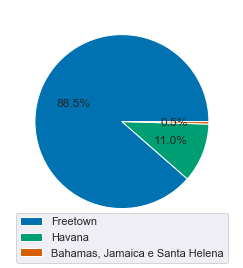

Freetown                      81009
Havana                        10058
Bahamas (não especificado)      183
Kingston, Jamaica               144
Santa Helena                     96
Name: Disembarkation, dtype: int64


In [25]:
fig, ax = plt.subplots()
ax.pie(disemb_dvalues, autopct='%1.1f%%')
fig.legend(disemb_dkeys, loc=8)
plt.show()
print(disemb0)

Agora verificando com porcentagens, podemos ver como a grande maioria das pessoas desembarcaram em Freetown (88.5%) e uma pequena fatia em Bahamas, Jamaica e Santa Helena (0,5 %). 

Analisemos a coluna *Embarkation*, que mostra de qual local as pessoas resgatadas embarcaram (e fiz outra tradução). 

In [26]:
file = file.replace({'Old Calabar': 'Velha Calabar'})
emb0 = file.Embarkation.value_counts()
emb0.shape
emb0

Lagos                              15730
Bonny                              14449
Ouidah                              8306
Velha Calabar                       7192
Gallinhas                           4522
Bight of Benin unspecified          3958
Rio Pongo                           2922
Badagry                             2729
Cameroons River                     2165
Sierra Leone unspecified            2091
Loango                              1926
Bight of Biafra unspecified         1856
Rio Brass                           1603
Popo                                1542
Sherbro                             1422
Rio Nun                             1405
New Calabar                         1324
Freetown                            1167
desconhecido                        1126
Cabinda                             1124
Ambriz                              1101
Bimbia                               892
Cameroons, unspecified               862
Congo North                          715
Bissau          

Verificamos aqui todos os 60 locais em ordem decrescente de acordo com o número de pessoas embarcadas. Podemos verificar que são desconhecidos os locais de embarque de 1126 pessoas.

Como fica inviável plotar todos os 60 locais, decidi separar os 5 locais com os maiores valores e definir o restante como "outros". 

In [27]:
emb1 = pd.Series(emb0[:5])
emb2 = {'outros': sum(emb0[5:])}
emb2 = pd.Series(emb2, index=['outros'])
emb = pd.concat((emb2, emb1))

E então fazer a transformação com dicionários e plotar.

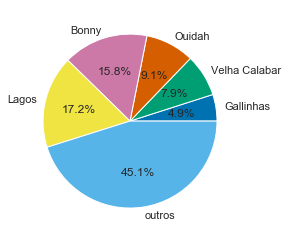

outros           41291
Lagos            15730
Bonny            14449
Ouidah            8306
Velha Calabar     7192
Gallinhas         4522
dtype: int64


In [28]:
emb_d = dict(emb.sort_values())
emb_dkeys, emb_dvalues = zip(*emb_d.items())

fig, ax = plt.subplots()
ax.pie(emb_dvalues, labels=emb_dkeys, autopct='%1.1f%%')

plt.show()   

print(emb)

Como podemos verificar, o maior número de embarques ocorreu em Lagos (15.730 - 17,2% dos embarques). 

Aproveite a ocasião e conheça sobre a "Porta do Não Retorno" em Ouidah: https://pt.wikipedia.org/wiki/Porta_do_Não_Retorno. 

A próxima plotagem mostra a distribuição da quantidade de resgates no período de registro do banco de dados (de 1808 a 1862). Plotando pra entender melhor. 

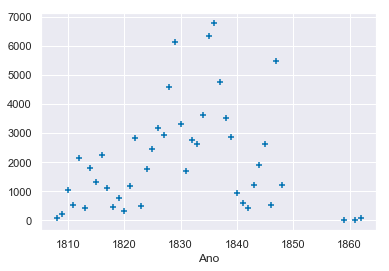

In [29]:
arrival = pd.DataFrame(file.Arrival.value_counts()).reset_index(
        ).sort_values(by='index')
arrival = arrival.rename(columns={'index': 'Ano', 'Arrival': 
    'Pessoas resgatadas'})
    
fig, ax = plt.subplots()    
ax.scatter(x='Ano', y='Pessoas resgatadas', data=arrival, marker='+')
ax.set_xlabel('Ano')

plt.show()

Cada ponto do gráfico (+) corresponde a quantidade de pessoas resgatadas por ano. Podemos verificar que após a metade de 1820, a quantidade de pessoas resgatadas deu um salto, diminuindo a partir da segunda metade da década de 1840.

A plotagem abaixo mostra a origem das pessoas resgatadas. Ao que parece, não se trata somente de origem geográfica, mas também origem étnica (além de subgrupos). Qual a quantidade de grupos geográficos ou étnicos que o banco de dados possui? Vamos verificar a seguir. 

In [30]:
origin0a = file['Country of Origin'].value_counts()
origin0a.shape

(564,)

Como fica inviável plotar 564 origens étnicas ou geográficas, veja como decidi fazer:

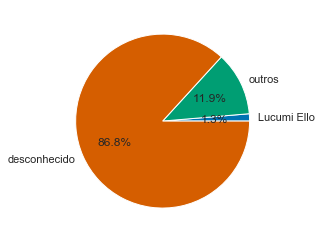

desconhecido        79404
Lucumi Ello          1235
Congo                1172
Eboo, Hebo            762
Lucumi                582
Carabali Suamo        490
Mandinga              474
Lucumi Ecumacho       470
Ganga                 465
Carabali Camaron      396
Congo Mondongo        362
Name: Country of Origin, dtype: int64


In [31]:
origin1a = pd.Series(origin0a[:2])
origin2a = {'outros': sum(origin0a[2:])}
origin2a = pd.Series(origin2a, index=['outros'])
origina = pd.concat((origin2a, origin1a))

origina_d = dict(origina.sort_values())
origina_dkeys, origina_dvalues = zip(*origina_d.items())

fig, ax = plt.subplots()
ax.pie(origina_dvalues, labels=origina_dkeys, autopct='%1.1f%%')
plt.show()

print(origin0a.head(11))

Verificamos que a maioria dos registros que chamamos de "origem" é desconhecida. *Lucumi Ello* tem o maior número de menções, com apenas 1,3%. Apesar disso, é interessante explorar os outros registros. Por isso, decidi retirar os dados desconhecidos e analisar os conhecidos, assim: 

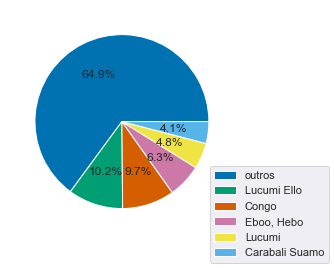

outros            7845
Lucumi Ello       1235
Congo             1172
Eboo, Hebo         762
Lucumi             582
Carabali Suamo     490
dtype: int64


In [32]:
origin0b = origin0a.iloc[1:] #retirando os dados desconhecidos

origin1b = pd.Series(origin0b[:5])
origin2b = {'outros': sum(origin0b[5:])}
origin2b = pd.Series(origin2b, index=['outros'])
originb = pd.concat((origin2b, origin1b))

originb_d = dict(originb.sort_values(ascending=False))
originb_dkeys, originb_dvalues = zip(*originb_d.items())

fig, ax = plt.subplots()
ax.pie(originb_dvalues, autopct='%1.1f%%')
fig.legend(originb_dkeys, loc=4)
plt.show()

print(originb)

A próxima plotagem nos diz sobre o gênero das pessoas embarcadas. Após fazer as traduções, temos as seguintes informações:

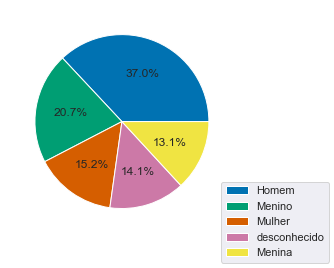

Homem           33827
Menino          18896
Mulher          13870
desconhecido    12878
Menina          12019
Name: Sexage, dtype: int64


In [33]:
file = file.replace({'Man': 'Homem', 'Boy': 'Menino', 'Woman': 'Mulher', 
                     'Girl': 'Menina'})
sexage = file.Sexage.value_counts()
sexage_d = dict(sexage)
sexage_dkeys, sexage_dvalues = zip(*sexage_d.items())

fig, ax = plt.subplots()
ax.pie(sexage_dvalues, autopct='%1.1f%%')
fig.legend(sexage_dkeys, loc=4)
plt.show()

print(sexage)

Verificamos que a maioria das pessoas embarcadas eram do gênero masculino, com 37% de homens e 20.7% de meninos. E 14.1% dos gêneros são desconhecidos. Seria interessante conhecer através da análise de dados qual o método para definir homens, mulheres, meninos e meninas. Incentivo vocês a fazerem isso! =)

Agora vamos conhecer a faixa etária das pessoas nas embarcações. 

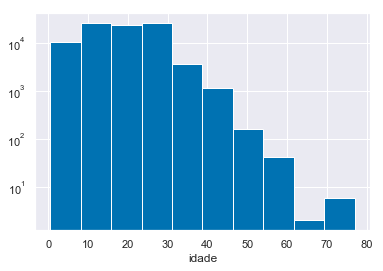

count    91490.000000
mean        18.889534
std          8.549236
min          0.500000
25%         11.000000
50%         19.000000
75%         26.000000
max         77.000000
Name: Age, dtype: float64

In [34]:
age = file.Age
fig, ax = plt.subplots()    
ax.hist(age, log=True)
ax.set_xlabel('idade')
plt.show()

age.describe()

Conforme já havíamos verificado, o histograma acima mostra que a embarcação era majoritariamente composta por pessoas jovens. Confirmamos também que havia muitas crianças e até bebês, bem como idosos nessas embarcações. =(

O banco de dados também fornece os nomes das embarcações. Conforme veremos abaixo, 444 diferentes navios foram registrados (alguns deles são interceptados mais de uma vez). 

In [35]:
ship0 = file['Ship name'].value_counts()
ship0.shape

(444,)

Agora vamos conhecer alguns nomes:

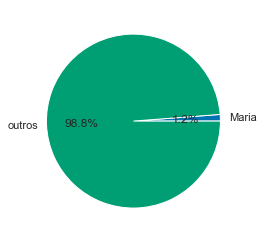

Maria        1116
Carolina     1089
Emilia        886
Esperança     860
Vingador      845
Name: Ship name, dtype: int64


In [36]:
ship1 = pd.Series(ship0[:1])
ship2 = {'outros': sum(ship0[1:])}
ship2 = pd.Series(ship2, index=['outros'])
ship = pd.concat((ship2, ship1))

ship_d = dict(ship.sort_values())
ship_dkeys, ship_dvalues = zip(*ship_d.items())

fig, ax = plt.subplots()
ax.pie(ship_dvalues, labels=ship_dkeys, autopct='%1.1f%%')
plt.show()

print(ship0.head())

Conforme esperávamos, fica inviável plotar todos os navios. Vamos selecionar os 10 navios que mais transportaram pessoas:

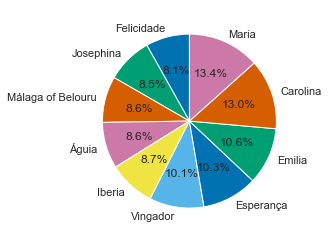

Maria                1116
Carolina             1089
Emilia                886
Esperança             860
Vingador              845
Iberia                726
Águia                 720
Málaga of Belouru     716
Josephina             712
Felicidade            680
Name: Ship name, dtype: int64


In [37]:
shipb = ship0.head(10)
shipb_d = dict(shipb.sort_values())
shipb_dkeys, shipb_dvalues = zip(*shipb_d.items())

shipb = ship0.head(10)
shipb_d = dict(shipb.sort_values())
shipb_dkeys, shipb_dvalues = zip(*shipb_d.items())

fig, ax = plt.subplots()
ax.pie(shipb_dvalues, labels=shipb_dkeys, autopct='%1.1f%%', startangle=90)
plt.show()

print(shipb)

Por curiosidade, vamos conhecer os navios com menos pessoas resgatadas:

In [38]:
print('Os 30 navios com menos resgates:')
print(ship0[-30:])

Os 30 navios com menos resgates:
S Joãozinho                                      6
Linda Africano                                   5
Africans escaped to the colony for protection    5
Unidentified (Group 32)                          4
Seized in the colony                             3
Emprendador                                      3
HMS Hecate                                       3
Tres Amigos                                      3
Landed from HMS Favourite                        3
Two Cousins                                      3
Eliza Davidson                                   2
Nymfa do Mar                                     2
Rapido                                           2
Seized in the Gambia by Capt Finlay              2
Santana de Africa                                2
Feliz Victoria                                   2
HMCS Charlotte                                   1
desconhecido                                     1
Seized at town near Rio Pongas                   

Uma triste curiosidade: um dos navios tem meu nome. Foi muito triste o dia que eu detectei isso. =( 

No total, foram resgatadas 131 pessoas desse navio.

In [39]:
fabiana = file[file['Ship name'] == 'Fabiana']
fabiana.shape

(131, 11)

Verificamos também que 118 pessoas embarcaram neste navio em Bonny e 13 em Trade Town.

In [40]:
fabiana.Embarkation.value_counts()

Bonny         118
Trade Town     13
Name: Embarkation, dtype: int64

Todas as pessoas do navio em questão desembarcaram em Freetown, como veremos abaixo.

In [41]:
fabiana.Disembarkation.value_counts()

Freetown    131
Name: Disembarkation, dtype: int64

Finalmente, verificaremos agora que no ano de 1819, 13 pessoas foram resgatadas deste navio. Em 1823, 118.

In [42]:
fabiana.Arrival.value_counts()

1823    118
1819     13
Name: Arrival, dtype: int64

Depois de analisar algumas características gerais, agora vamos analisar os dados das pessoas desembarcadas por local, ou seja: Freetown, Havana, Bahamas, Kingston (Jamaica) e Santa Helena.

**Freetown**

Primeiro, vamos analisar a origem geofráfica ou étnica das pessoas que desembarcaram em Freetown. Os códigos utilizados a partir de agora são muito parecidos com os que usamos até aqui. 

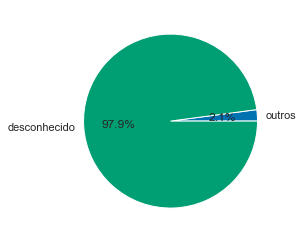

outros           1707
desconhecido    79302
dtype: int64


In [43]:
disemb_ft = file[file.Disembarkation == 'Freetown'] # separando os dados de Freetown
originfta0 = disemb_ft['Country of Origin'].value_counts()
originfta0.shape

originfta1 = pd.Series(originfta0[:1])
originfta2 = {'outros': sum(originfta0[1:])}
originfta2 = pd.Series(originfta2, index=['outros'])
originfta = pd.concat((originfta2, originfta1))

originfta_d = dict(originfta.sort_values())
originfta_d = {x:y for x, y in originfta_d.items() if y != 0} 
originfta_dkeys, originfta_dvalues = zip(*originfta_d.items())

fig, ax = plt.subplots()
ax.pie(originfta_dvalues, labels=originfta_dkeys, autopct='%1.1f%%')
plt.show()

print(originfta)

Verificamos que somente 2.4% das pessoas que desembarcaram em Freetown tem origem geográfica ou étnica conhecida. Apesar de ser muito pouco, vale a pena analisar os dados conhecidos.

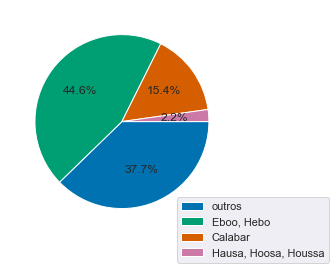

outros                  644
Eboo, Hebo              762
Calabar                 263
Hausa, Hoosa, Houssa     38
dtype: int64


In [44]:
originftb0 = originfta0.iloc[1:]
originftb0.shape

originftb1 = pd.Series(originftb0[:3])
originftb2 = {'outros': sum(originftb0[3:])}
originftb2 = pd.Series(originftb2, index=['outros'])
originftb = pd.concat((originftb2, originftb1))

originftb_d = dict(originftb)
originftb_d = {x:y for x, y in originftb_d.items() if y != 0} 
originftb_dkeys, originftb_dvalues = zip(*originftb_d.items())

fig, ax = plt.subplots()
ax.pie(originftb_dvalues, autopct='%1.1f%%', counterclock=False)
fig.legend(originftb_dkeys, loc=4)
plt.show()

print(originftb)

Agora vamos conhecer os dados sobre o gênero das pessoas desembarcadas em Freetown.

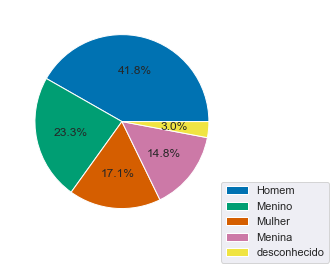

Homem           33827
Menino          18896
Mulher          13870
Menina          12019
desconhecido     2397
Name: Sexage, dtype: int64


In [45]:
sexage_ft = disemb_ft.Sexage.value_counts()
sexageft_d = dict(sexage_ft)
sexageft_dkeys, sexageft_dvalues = zip(*sexageft_d.items())

fig, ax = plt.subplots()
ax.pie(sexageft_dvalues, autopct='%1.1f%%')
fig.legend(sexageft_dkeys, loc=4)
plt.show()

print(sexage_ft)

Agora a faixa etária:

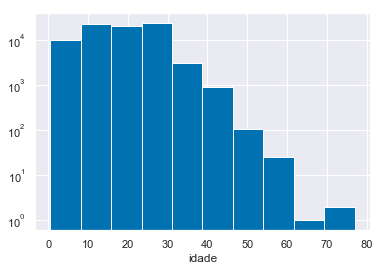

count    81009.000000
mean        18.835859
std          8.520610
min          0.500000
25%         11.000000
50%         20.000000
75%         26.000000
max         77.000000
Name: Age, dtype: float64

In [46]:
age_ft = disemb_ft.Age
fig, ax = plt.subplots()    
ax.hist(age_ft, log=True)
ax.set_xlabel('idade')
plt.show()

age_ft.describe()

Agora vamos observar o total de desembarques por ano dos dados gerais (+) comparado com os desembarques em Freetown, assim:

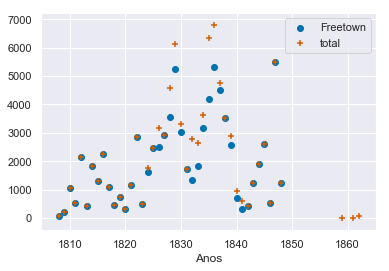

In [47]:
arrivalft = pd.DataFrame(disemb_ft.Arrival.value_counts()).reset_index(
        ).sort_values(by='index')
arrivalft = arrivalft.rename(columns={'index': 'Ano', 'Arrival': 
    'Pessoas resgatadas'})
    
fig, ax = plt.subplots()  
ax.scatter(x='Ano', y='Pessoas resgatadas', data=arrivalft)  
ax.scatter(x='Ano', y='Pessoas resgatadas', data=arrival, marker='+', 
           c='#D55E00')
ax.set_xlabel('Anos')
ax.legend(labels=['Freetown', 'total'])
fig.savefig('desembarque_ft.png', dpi=300)
plt.show()

Até aqui e conforme o esperado, os dados de Freetown e os dados gerais têm poucas variações porque a grande maioria dos registros são provenientes de lá. Porém nesta plotagem, verificamos algumas informações relevantes. Uma delas é que os resgates ocorridos por volta de 1860 certamente não ocorreram em Freetown. Até a metade da década de 1820, somente há registros em Freetown. Depois disso, até por volta do início da década de 1840, há registros de desembarques em outros locais. Vamos descobrir de onde são no decorrer da análise dos dados.

Finalmente vamos analisar uma última característica de Freetown: os locais de onde as pessoas embarcaram e a quantidade. 

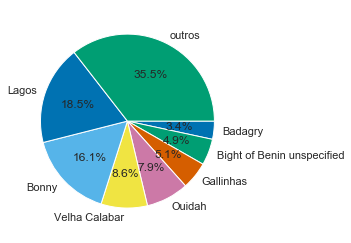

outros                        28765
Lagos                         14947
Bonny                         13067
Velha Calabar                  6981
Ouidah                         6415
Gallinhas                      4147
Bight of Benin unspecified     3958
Badagry                        2729
dtype: int64


In [48]:
embft0 = disemb_ft['Embarkation'].value_counts()
embft0.shape

embft1 = pd.Series(embft0[:7])
embft2 = {'outros': sum(embft0[7:])}
embft2 = pd.Series(embft2, index=['outros'])
embft = pd.concat((embft2, embft1))

embft_d = dict(embft.sort_values())
embft_dkeys, embft_dvalues = zip(*embft_d.items())

fig, ax = plt.subplots()
ax.pie(embft_dvalues, labels=embft_dkeys, autopct='%1.1f%%', 
       counterclock=False)
fig.savefig('embarque_ft.png', dpi=300)
plt.show()

print(embft)

Verificamos aqui que, das pessoas que desembarcaram em Freetown, a maior parte delas veio de Lagos: 14.947 pessoas. Seguido de Bonny, Velha Calabar e assim em diante. 

**Havana**

Vamos agora analisar os dados dos desembarcados em Havana.

Seguindo a ordem, conhecer a origem étnica ou geográfica dos resgatados.

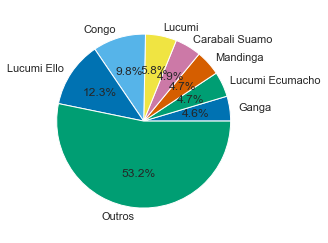

Outros             5353
Lucumi Ello        1235
Congo               989
Lucumi              582
Carabali Suamo      490
Mandinga            474
Lucumi Ecumacho     470
Ganga               465
dtype: int64


In [49]:
disemb_hv = file[file.Disembarkation == 'Havana']
originhv0 = disemb_hv['Country of Origin'].value_counts()
originhv0.shape

originhv1 = pd.Series(originhv0[:7])
originhv2 = {'Outros': sum(originhv0[7:])}
originhv2 = pd.Series(originhv2, index=['Outros'])
originhv = pd.concat((originhv2, originhv1))

originhv_d = dict(originhv.sort_values())
originhv_d = {x:y for x, y in originhv_d.items() if y != 0} 
originhv_dkeys, originhv_dvalues = zip(*originhv_d.items())

fig, ax = plt.subplots()
ax.pie(originhv_dvalues, labels=originhv_dkeys, autopct='%1.1f%%')
plt.show()

print(originhv)

Verificamos que, como era comum nas embarcações, os resgatados tinham diversas origens. No caso de Havana, a maior parte deles eram *Lucumi Ello*, com 1.235 pessoas. Outra informação interessante é que, como citamos antes, havia subgrupos étnicos, como por exemplo, além dos *Lucumi Ello*, havia também *Lucumi Ecumacho*. 

A seguir, o gênero das pessoas que desembarcaram em Havana.

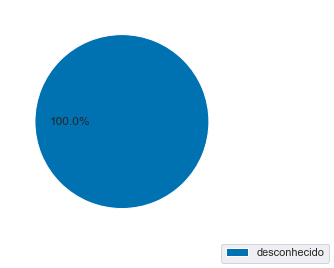

desconhecido    10058
Name: Sexage, dtype: int64


In [50]:
sexage_hv = disemb_hv.Sexage.value_counts()
sexagehv_d = dict(sexage_hv)
sexagehv_dkeys, sexagehv_dvalues = zip(*sexagehv_d.items())

fig, ax = plt.subplots()
ax.pie(sexagehv_dvalues, autopct='%1.1f%%')
fig.legend(sexagehv_dkeys, loc=4)
plt.show()

print(sexage_hv)

Verificamos que, infelizmente, todos os dados relativos ao gênero em Havana são desconhecidos.

Outro gráfico, desta vez indicando a faixa etária.

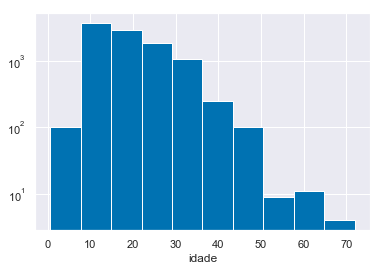

count    10058.000000
mean        19.296234
std          8.764830
min          0.600000
25%         12.000000
50%         18.000000
75%         25.000000
max         72.000000
Name: Age, dtype: float64

In [51]:
age_hv = disemb_hv.Age
fig, ax = plt.subplots()    
ax.hist(age_hv, log=True)
ax.set_xlabel('idade')
plt.show()

age_hv.describe()

A média de idade dos resgatados em Havana é um pouco maior do que o geral. Mesmo assim, segue a tendência de haver muitas crianças nas embarcações, e também idosos. 

Agora, outro gráfico que mostra a quantidade de resgatados por ano em Havana comparado com o geral.

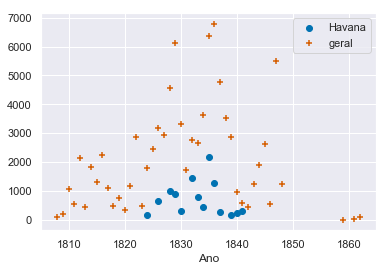

In [52]:
arrivalhv = pd.DataFrame(disemb_hv.Arrival.value_counts()).reset_index(
        ).sort_values(by='index')
arrivalhv = arrivalhv.rename(columns={'index': 'Ano', 'Arrival': 
    'Pessoas resgatadas'})
    
fig, ax = plt.subplots()  
ax.scatter(x='Ano', y='Pessoas resgatadas', data=arrivalhv)  
ax.scatter(x='Ano', y='Pessoas resgatadas', data=arrival, marker='+', 
           c='#D55E00')
ax.set_xlabel('Ano')
ax.legend(labels=['Havana', 'geral'])

plt.show() 

Verificamos que os resgatados de Havana se concentram no período que vai de um pouco antes da metade da década de 1820 até início da década de 1840. Também que, neste período, é o maior período de resgates que o banco de dados registra. 

Vamos conhecer agora dados que mostram os locais de embarque mais frequentes dos que desembarcaram em Havana.

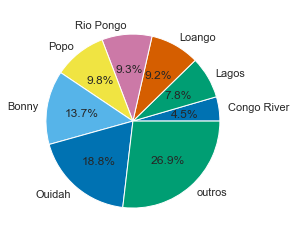

outros         2702
Ouidah         1891
Bonny          1382
Popo            988
Rio Pongo       936
Loango          922
Lagos           783
Congo River     454
dtype: int64


In [53]:
embhv0 = disemb_hv['Embarkation'].value_counts()

embhv1 = pd.Series(embhv0[:7])
embhv2 = {'outros': sum(embhv0[7:])}
embhv2 = pd.Series(embhv2, index=['outros'])
embhv = pd.concat((embhv2, embhv1))

embhv_d = dict(embhv.sort_values())
embhv_dkeys, embhv_dvalues = zip(*embhv_d.items())

fig, ax = plt.subplots()
ax.pie(embhv_dvalues, labels=embhv_dkeys, autopct='%1.1f%%')
plt.show()
   
print(embhv)

A maioria embarcou em Ouidah, seguido de Bonny e Popo. 

**Bahamas**

Vamos conhecer agora os dados sobre os desembarcados em Bahamas, começando com a origem étnica ou geográfica.

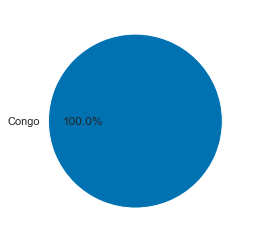

outros             0
Congo            183
desconhecido       0
Congo Cumi         0
Congo Decolo       0
Congo Danval       0
Congo Damba        0
Congo Cutuide      0
Congo Cusa         0
Congo Cuno         0
Congo Cuma         0
dtype: int64


In [54]:
disemb_bh = file[file.Disembarkation == 'Bahamas (não especificado)']
originbh0 = disemb_bh['Country of Origin'].value_counts()

originbh1 = pd.Series(originbh0[:10])
originbh2 = {'outros': sum(originbh0[10:])}
originbh2 = pd.Series(originbh2, index=['outros'])
originbh = pd.concat((originbh2, originbh1))

originbh_d = dict(originbh)
originbh_d = {x:y for x, y in originbh_d.items() if y != 0} 
originbh_dkeys, originbh_dvalues = zip(*originbh_d.items())

fig, ax = plt.subplots()
ax.pie(originbh_dvalues, labels=originbh_dkeys, autopct='%1.1f%%')
plt.show()

print(originbh)

Absolutamente todas as pessoas que desembarcaram em Bahamas são do Congo (obviamente, nos registros deste banco de dados). Vamos ver quanto ao gênero.

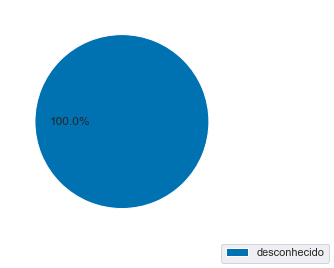

desconhecido    183
Name: Sexage, dtype: int64


In [55]:
sexage_bh = disemb_bh.Sexage.value_counts()
sexagebh_d = dict(sexage_bh)
sexagebh_dkeys, sexagebh_dvalues = zip(*sexagebh_d.items())

fig, ax = plt.subplots()
ax.pie(sexagebh_dvalues, autopct='%1.1f%%')
fig.legend(sexagebh_dkeys, loc=4)
plt.show()

print(sexage_bh)

Não há registros referentes ao gênero no banco de dados. Vamos verificar em relação à faixa etária:

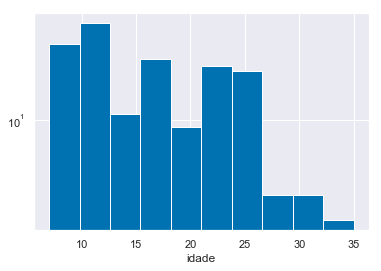

count    183.000000
mean      15.797814
std        6.560588
min        7.000000
25%       10.000000
50%       15.000000
75%       22.000000
max       35.000000
Name: Age, dtype: float64

In [56]:
age_bh = disemb_bh.Age
fig, ax = plt.subplots()    
ax.hist(age_bh, log=True)
ax.set_xlabel('idade')
plt.show()

age_bh.describe()

Aqui o gráfico é diferente dos que vimos até agora. A média é menor do que o geral, mostrando que a maioria nas embarcações era composta por adolescentes. Não há registros aqui de bebês (mas de crianças sim), nem de idosos. A idade máxima é de 35 anos. 

Comparando o número de resgates por ano em Bahamas com o geral:

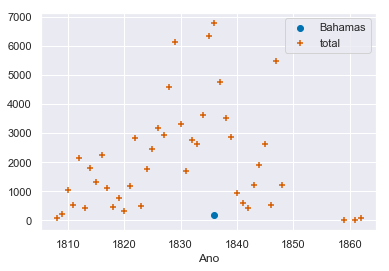

In [57]:
arrivalbh = pd.DataFrame(disemb_bh.Arrival.value_counts()).reset_index(
        ).sort_values(by='index')
arrivalbh = arrivalbh.rename(columns={'index': 'Ano', 'Arrival': 
    'Pessoas resgatadas'})
    
fig, ax = plt.subplots()  
ax.scatter(x='Ano', y='Pessoas resgatadas', data=arrivalbh)  
ax.scatter(x='Ano', y='Pessoas resgatadas', data=arrival, marker='+', 
           c='#D55E00')
ax.set_xlabel('Ano')
ax.legend(labels=['Bahamas', 'total'])
plt.show()   

Conforme esperado, já que há poucos registros dos desembarcados em Bahamas em relação ao geral, a quantidade de resgates lá é baixa, tendo registro apenas por volta da metade da década de 1830. 

Agora, vamos aos registros que mostram os locais de embarque dos resgatados que desembarcaram em Bahamas:

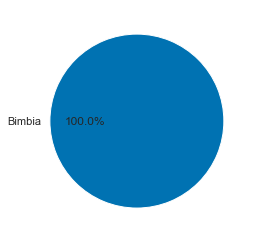

outros      0
Bimbia    183
dtype: int64


In [58]:
embbh0 = disemb_bh['Embarkation'].value_counts()

embbh1 = pd.Series(embbh0[:7])
embbh2 = {'outros': sum(embbh0[7:])}
embbh2 = pd.Series(embbh2, index=['outros'])
embbh = pd.concat((embbh2, embbh1))

embbh_d = dict(embbh.sort_values())
embbh_d = {x:y for x, y in embbh_d.items() if y != 0} 
embbh_dkeys, embbh_dvalues = zip(*embbh_d.items())

fig, ax = plt.subplots()
ax.pie(embbh_dvalues, labels=embbh_dkeys, autopct='%1.1f%%', counterclock=False)
plt.show()
    
print(embbh)

Todos os desembarcados em Bahamas embarcaram em Bimbia. Daqui, podemos conjecturar o seguinte: teria relação com a origem étnica ou geográfica deste segmento?

**Kingston, Jamaica**

Vamos aos resgatados que desembarcaram neste local, começando pela origem étnica ou geográfica.

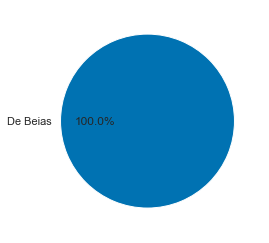

De Beias         144
Congo Cuma         0
Congo Cumi         0
Congo Cuno         0
Congo Cusa         0
Congo Cutuide      0
Congo Damba        0
Congo Danval       0
Congo Cay          0
desconhecido       0
outros             0
dtype: int64


In [59]:
disemb_jm = file[file.Disembarkation == 'Kingston, Jamaica']
originjm0 = disemb_jm['Country of Origin'].value_counts()

originjm1 = pd.Series(originjm0[:10])
originjm2 = {'outros': sum(originjm0[10:])}
originjm2 = pd.Series(originjm2, index=['outros'])
originjm = pd.concat((originjm2, originjm1)).sort_values(ascending=False)

originjm_d = dict(originjm)
originjm_d = {x:y for x, y in originjm_d.items() if y != 0}
originjm_dkeys, originjm_dvalues = zip(*originjm_d.items())

fig, ax = plt.subplots()
ax.pie(originjm_dvalues, labels=originjm_dkeys, autopct='%1.1f%%')
plt.show()

print(originjm)

Todos têm origem étnica ou geográfica em De Beias.

Vamos ao gênero:

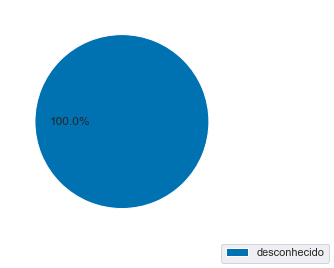

desconhecido    144
Name: Sexage, dtype: int64


In [60]:
sexage_jm = disemb_jm.Sexage.value_counts()
sexagejm_d = dict(sexage_jm)
sexagejm_dkeys, sexagejm_dvalues = zip(*sexagejm_d.items())

fig, ax = plt.subplots()
ax.pie(sexagejm_dvalues, autopct='%1.1f%%')
fig.legend(sexagejm_dkeys, loc=4)
plt.show()

print(sexage_jm)

Infelizmente em Kingston também não temos informações sobre o gênero dos resgatados. E em relação à faixa etária?

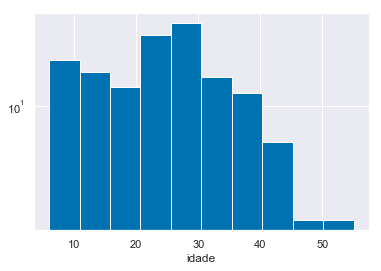

count    144.000000
mean      24.618055
std       10.903901
min        6.000000
25%       16.000000
50%       25.000000
75%       31.250000
max       55.000000
Name: Age, dtype: float64

In [61]:
age_jm = disemb_jm.Age

fig, ax = plt.subplots()    
ax.hist(age_jm, log=True)
ax.set_xlabel('idade')
plt.show()

age_jm.describe()

Aqui a idade média também é diferente do geral, desta vez maior, entre 24 e 25 anos. 

Sobre a comparação dos resgates em Kingston, Jamaica e o geral, é o que segue:

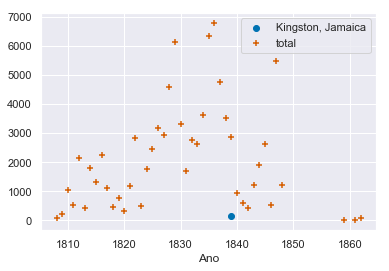

In [62]:
arrivaljm = pd.DataFrame(disemb_jm.Arrival.value_counts()).reset_index(
        ).sort_values(by='index')
arrivaljm = arrivaljm.rename(columns={'index': 'Ano', 'Arrival': 
    'Pessoas resgatadas'})
    
fig, ax = plt.subplots()  
ax.scatter(x='Ano', y='Pessoas resgatadas', data=arrivaljm)  
ax.scatter(x='Ano', y='Pessoas resgatadas', data=arrival, marker='+', 
           c='#D55E00')
ax.set_xlabel('Ano')
ax.legend(labels=['Kingston, Jamaica', 'total'])
plt.show() 

Poucos resgates como esperávamos e por volta do final da década de 1830. 

Sobre os locais de embarque:

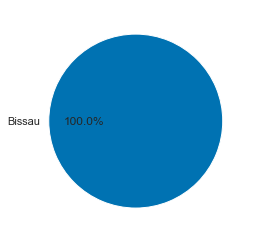

Bissau    144
Outros      0
dtype: int64


In [63]:
embjm0 = disemb_jm['Embarkation'].value_counts()

embjm1 = pd.Series(embjm0[:7])
embjm2 = {'Outros': sum(embjm0[7:])}
embjm2 = pd.Series(embjm2, index=['Outros'])
embjm = pd.concat((embjm2, embjm1)).sort_values(ascending=False)

embjm_d = dict(embjm)
embjm_d = {x:y for x, y in embjm_d.items() if y != 0} 
embjm_dkeys, embjm_dvalues = zip(*embjm_d.items())

fig, ax = plt.subplots()
ax.pie(embjm_dvalues, labels=embjm_dkeys, autopct='%1.1f%%', counterclock=False)
plt.show()
    
print(embjm)

Todos embarcaram em Bissau e a mesma conjectura: tem relação com a origem étnica ou geográfica?

**Santa Helena**

Vamos à análise do último local onde os resgatados foram desembarcados, começando com a origem étnica ou geográfica:

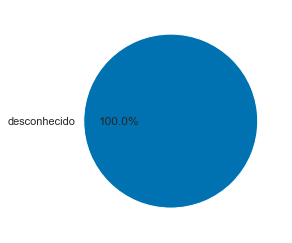

desconhecido     96
Congo Densuco     0
Congo Conche      0
Congo Cumi        0
Congo Cuno        0
Congo Cusa        0
Congo Cutuide     0
Congo Damba       0
Congo Danval      0
Congo Cuma        0
Outros            0
dtype: int64


In [64]:
disemb_hl = file[file.Disembarkation == 'Santa Helena']
originhl0 = disemb_hl['Country of Origin'].value_counts()

originhl1 = pd.Series(originhl0[:10])
originhl2 = {'Outros': sum(originhl0[10:])}
originhl2 = pd.Series(originhl2, index=['Outros'])
originhl = pd.concat((originhl2, originhl1)).sort_values(ascending=False)

originhl_d = dict(originhl)
originhl_d = {x: y for x, y in originhl_d.items() if y!= 0}
originhl_dkeys, originhl_dvalues = zip(*originhl_d.items())

fig, ax = plt.subplots()
ax.pie(originhl_dvalues, labels=originhl_dkeys, autopct='%1.1f%%')
plt.show()

print(originhl)

Não há registros. Agora vamos ao gênero:

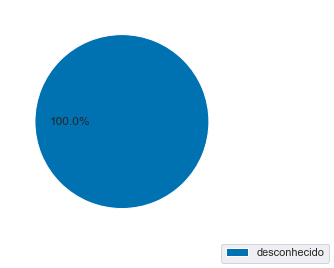

desconhecido    96
Name: Sexage, dtype: int64


In [65]:
sexage_hl = disemb_hl.Sexage.value_counts()
sexagehl_d = dict(sexage_hl)
sexagehl_dkeys, sexagehl_dvalues = zip(*sexagehl_d.items())

fig, ax = plt.subplots()
ax.pie(sexagehl_dvalues, autopct='%1.1f%%')
fig.legend(sexagehl_dkeys, loc=4)
plt.show()

print(sexage_hl)

Também desconhecido. Faixa etária:

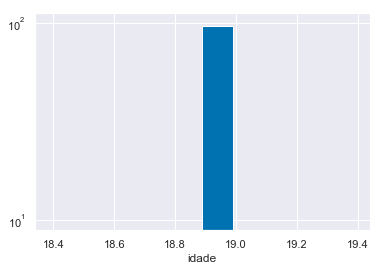

count    96.000000
mean     18.889683
std       0.000019
min      18.889702
25%      18.889702
50%      18.889702
75%      18.889702
max      18.889702
Name: Age, dtype: float64

In [66]:
age_hl = disemb_hl.Age
fig, ax = plt.subplots()    
ax.hist(age_hl, log=True)
ax.set_xlabel('idade')
plt.show()

age_hl.describe()

Este gráfico está estranho. Mas lembra-se que no lugar de registros NaNs preenchemos com a média da idade? Levando isso em consideração e observando que a média é exatamente igual à média geral, assim como as idades mínimas e máximas, bem como os quartis, podemos concluir que os dados referentes à faixa etária também são desconhecidos. 

Comparando os resgates em Santa Helena com o geral:

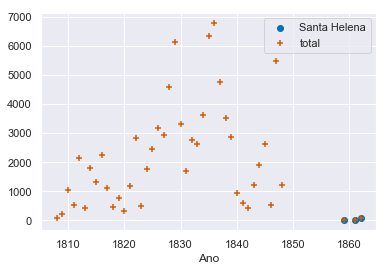

In [67]:
arrivalhl = pd.DataFrame(disemb_hl.Arrival.value_counts()).reset_index(
        ).sort_values(by='index')
arrivalhl = arrivalhl.rename(columns={'index': 'Ano', 'Arrival': 
    'Pessoas resgatadas'})
    
fig, ax = plt.subplots()  
ax.scatter(x='Ano', y='Pessoas resgatadas', data=arrivalhl)  
ax.scatter(x='Ano', y='Pessoas resgatadas', data=arrival, marker='+', 
           c='#D55E00')
ax.set_xlabel('Ano')
ax.legend(labels=['Santa Helena', 'total'])

plt.show() 

Santa Helena é um *outlier*, pois os registros mostram que os resgates aconteceram fora do período de maior frequência, entre o final da década de 1850 e parte na década de 1860. E neste período não há, ao menos no banco de dados, registros de outros resgates. Seria interessante descobrir o motivo. 

Quase finalizando, vamos à última análise referente à Santa Helena: locais de embarque dos resgatados.

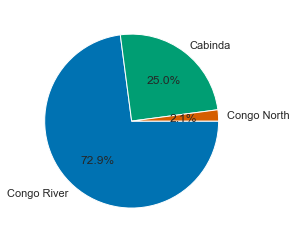

Congo River    70
Cabinda        24
Congo North     2
Outros          0
dtype: int64


In [68]:
embhl0 = disemb_hl['Embarkation'].value_counts()

embhl1 = pd.Series(embhl0[:7])
embhl2 = {'Outros': sum(embhl0[7:])}
embhl2 = pd.Series(embhl2, index=['Outros'])
embhl = pd.concat((embhl2, embhl1)).sort_values(ascending=False)

embhl_d = dict(embhl)
embhl_d = {x:y for x, y in embhl_d.items() if y != 0} 
embhl_dkeys, embhl_dvalues = zip(*embhl_d.items())

fig, ax = plt.subplots()
ax.pie(embhl_dvalues, labels=embhl_dkeys, autopct='%1.1f%%', counterclock=False)
plt.show()
    
print(embhl)

Os desembarcados em Santa Helena embarcaram de somente 3 locais: Rio Congo, Cabinda e Congo do Norte (tradução livre). 

Finalmente, finalizando a análise deste banco de dados, vamos ter uma visão geral da quantidade de resgates por ano em Freetown, Havana, Bahamas, Kingston e Santa Helena.

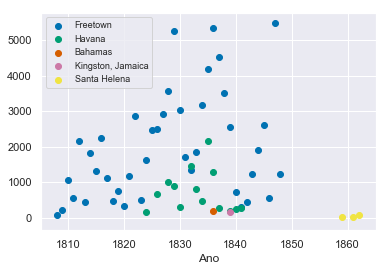

In [69]:
fig, ax = plt.subplots()  
ax.scatter(x='Ano', y='Pessoas resgatadas', data=arrivalft)
ax.scatter(x='Ano', y='Pessoas resgatadas', data=arrivalhv)
ax.scatter(x='Ano', y='Pessoas resgatadas', data=arrivalbh)
ax.scatter(x='Ano', y='Pessoas resgatadas', data=arrivaljm)
ax.scatter(x='Ano', y='Pessoas resgatadas', data=arrivalhl)
ax.set_xlabel('Ano')
ax.legend(labels=['Freetown', 'Havana', 'Bahamas', 
                  'Kingston, Jamaica', 'Santa Helena'], 
                  loc='upper left', fontsize=9)

plt.show() 

Muitas outras informações e relações podem ser retiradas deste banco de dados. Espero ansiosamente outras análises, inclusive mais profundas, deste banco de dados. 

E esta é a minha singela homenagem àqueles que jamais será esquecidos!